# Building an XGBoost Model for Airline Passenger Satisfaction Prediction

Predicting passenger satisfaction based on factors like flight distance, seat comfort, and service quality can be a game-changer for airlines. When airlines understand what really matters to passengers, they can focus on improving the right things, like upgrading seats on long-haul flights or training staff to deliver better service. Happy passengers mean repeat customers, positive reviews, and stronger brand loyalty. Plus, airlines can use these insights to personalize offers such as suggesting premium seats to comfort focused travelers which boosts revenue while making customers feel valued.  

Knowing which features impact satisfaction also helps airlines cut costs by avoiding unnecessary upgrades. For example, if short flights don’t need extra legroom to keep passengers happy, airlines can save money by optimizing cabin layouts. On the other hand, if service quality is a big deal for business travelers, airlines can invest in better training for crew members. This data-driven approach keeps customers satisfied without wasting resources, leading to smoother operations and higher profits. In the end, it’s a win-win: passengers get a better experience, and airlines run a smarter, more efficient business.

## Data Collection

In [1]:
import requests
import pandas as pd
from io import StringIO
def read_gd(sharingurl):
    file_id = sharingurl.split('/')[-2]
    download_url='https://drive.google.com/uc?export=download&id=' + file_id
    url = requests.get(download_url).text
    csv_raw = StringIO(url)
    return csv_raw

url = "https://drive.google.com/file/d/1gG0NpYi2hUh8oaYJg7tIsb157D0Qgpzt/view?usp=sharing"
gdd = read_gd(url)

df = pd.read_csv(gdd)

df.head()

,satisfaction,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,satisfied,Loyal Customer,65,Personal Travel,Eco,265,0,0,0,2,...,2,3,3,0,3,5,3,2,0,0.0
1,satisfied,Loyal Customer,47,Personal Travel,Business,2464,0,0,0,3,...,2,3,4,4,4,2,3,2,310,305.0
2,satisfied,Loyal Customer,15,Personal Travel,Eco,2138,0,0,0,3,...,2,2,3,3,4,4,4,2,0,0.0
3,satisfied,Loyal Customer,60,Personal Travel,Eco,623,0,0,0,3,...,3,1,1,0,1,4,1,3,0,0.0
4,satisfied,Loyal Customer,70,Personal Travel,Eco,354,0,0,0,3,...,4,2,2,0,2,4,2,5,0,0.0


## Exploratory Data Analysis

### Checking the information about the dataframe

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 22 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   satisfaction                       129880 non-null  object 
 1   Customer Type                      129880 non-null  object 
 2   Age                                129880 non-null  int64  
 3   Type of Travel                     129880 non-null  object 
 4   Class                              129880 non-null  object 
 5   Flight Distance                    129880 non-null  int64  
 6   Seat comfort                       129880 non-null  int64  
 7   Departure/Arrival time convenient  129880 non-null  int64  
 8   Food and drink                     129880 non-null  int64  
 9   Gate location                      129880 non-null  int64  
 10  Inflight wifi service              129880 non-null  int64  
 11  Inflight entertainment             1298

### Checking the distribution of target variable

In [3]:
df['satisfaction'].value_counts(normalize = True)

,proportion
satisfaction,
satisfied,0.547328
dissatisfied,0.452672


### Checking the datatypes of all features

In [4]:
df.dtypes

,0
satisfaction,object
Customer Type,object
Age,int64
Type of Travel,object
Class,object
Flight Distance,int64
Seat comfort,int64
Departure/Arrival time convenient,int64
Food and drink,int64
Gate location,int64


### Visualization of the target variable

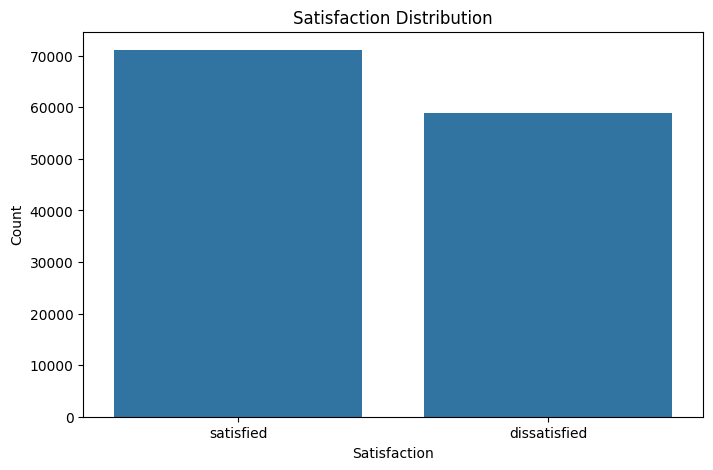

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize = (8,5))
sns.countplot(data = df, x = 'satisfaction')
plt.title('Satisfaction Distribution')
plt.xlabel('Satisfaction')
plt.ylabel('Count')
plt.show()

## Data Preprocessing

### Handling missing values

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 22 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   satisfaction                       129880 non-null  object 
 1   Customer Type                      129880 non-null  object 
 2   Age                                129880 non-null  int64  
 3   Type of Travel                     129880 non-null  object 
 4   Class                              129880 non-null  object 
 5   Flight Distance                    129880 non-null  int64  
 6   Seat comfort                       129880 non-null  int64  
 7   Departure/Arrival time convenient  129880 non-null  int64  
 8   Food and drink                     129880 non-null  int64  
 9   Gate location                      129880 non-null  int64  
 10  Inflight wifi service              129880 non-null  int64  
 11  Inflight entertainment             1298

##### Arrival Delay in Minutes contains some missing values

We calculate the mean of the feature and replace the missing values with the mean value

In [7]:
delay_in_minutes_mean = df['Arrival Delay in Minutes'].mean()
delay_in_minutes_mean

np.float64(15.09112883918849)

In [8]:
df['Arrival Delay in Minutes'] = df['Arrival Delay in Minutes'].fillna(delay_in_minutes_mean)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 22 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   satisfaction                       129880 non-null  object 
 1   Customer Type                      129880 non-null  object 
 2   Age                                129880 non-null  int64  
 3   Type of Travel                     129880 non-null  object 
 4   Class                              129880 non-null  object 
 5   Flight Distance                    129880 non-null  int64  
 6   Seat comfort                       129880 non-null  int64  
 7   Departure/Arrival time convenient  129880 non-null  int64  
 8   Food and drink                     129880 non-null  int64  
 9   Gate location                      129880 non-null  int64  
 10  Inflight wifi service              129880 non-null  int64  
 11  Inflight entertainment             1298

### Encode Catgorical Variables

#### Checking for categorical variables

In [9]:
df['Customer Type'].value_counts()

,count
Customer Type,
Loyal Customer,106100
disloyal Customer,23780


In [10]:
df['Type of Travel'].value_counts()

,count
Type of Travel,
Business travel,89693
Personal Travel,40187


In [11]:
df['Class'].value_counts()

,count
Class,
Business,62160
Eco,58309
Eco Plus,9411


In [12]:
df_encoded = pd.get_dummies(df, columns = ['Class', 'Type of Travel', 'Customer Type', 'satisfaction'], drop_first = True)
df_encoded.head()

,Age,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,...,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes,Class_Eco,Class_Eco Plus,Type of Travel_Personal Travel,Customer Type_disloyal Customer,satisfaction_satisfied
0,65,265,0,0,0,2,2,4,2,3,...,5,3,2,0,0.0,True,False,True,False,True
1,47,2464,0,0,0,3,0,2,2,3,...,2,3,2,310,305.0,False,False,True,False,True
2,15,2138,0,0,0,3,2,0,2,2,...,4,4,2,0,0.0,True,False,True,False,True
3,60,623,0,0,0,3,3,4,3,1,...,4,1,3,0,0.0,True,False,True,False,True
4,70,354,0,0,0,3,4,3,4,2,...,4,2,5,0,0.0,True,False,True,False,True


### Split the dataset

In [13]:
from sklearn.model_selection import train_test_split

y = df_encoded['satisfaction_satisfied']
x = df_encoded.drop(columns =['satisfaction_satisfied'])

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 42)

### Standardize the data

In [14]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

x_train_scaled = pd.DataFrame(data = x_train_scaled, columns = x_train.columns)
x_test_scaled = pd.DataFrame(data = x_test_scaled, columns = x_test.columns)


## Applying Linear Discriminant Analysis

In [15]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA(n_components = 1)
x_train_lda = lda.fit_transform(x_train_scaled, y_train)
x_test_lda = lda.transform(x_test_scaled)
x_train_lda

array([[ 0.66088869],
       [ 1.68906935],
       [-2.08259743],
       ...,
       [-1.90302741],
       [-0.08852403],
       [ 0.67383923]])

## Model Training using XGBoost
#### This is an example of Boosting Algorithm under Ensemble Learning. It will undergo hyperparameters tuning using grid search

In [16]:
import xgboost as xgb
from sklearn import model_selection

grid = {
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1],
    'n_estimators': [100, 200]
}
model = xgb.XGBClassifier()
gscv = model_selection.GridSearchCV(estimator=model, param_grid=grid, scoring='precision', cv=10)
gscv.fit(x_train, y_train)

GridSearchCV(cv=10,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None...
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             param_grid={'learning_rate': [0.01, 0.1], 'max_depth': [3, 5, 7],
                         'n_estimators': [100, 200]},
             scoring='precision')

In [17]:
print(gscv.cv_results_)

{'mean_fit_time': array([1.05773957, 1.57314496, 1.251841  , 2.26567118, 1.51037302,
       3.3130327 , 0.74101374, 1.55312853, 0.95256758, 2.05102172,
       1.4103302 , 2.46601906]), 'std_fit_time': array([0.3913003 , 0.48100343, 0.61874076, 0.76290387, 0.59131078,
       1.04722408, 0.03575576, 0.68484714, 0.12834459, 0.75359957,
       0.61090216, 0.55477558]), 'mean_score_time': array([0.03053064, 0.0368516 , 0.03415897, 0.05426011, 0.04719517,
       0.06504743, 0.02785363, 0.04137421, 0.03353055, 0.05184364,
       0.04215875, 0.07282872]), 'std_score_time': array([0.00728796, 0.00669827, 0.0022515 , 0.02080267, 0.01065866,
       0.00636585, 0.0020406 , 0.0155888 , 0.00167097, 0.01013224,
       0.001278  , 0.02033606]), 'param_learning_rate': masked_array(data=[0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.1, 0.1, 0.1, 0.1,
                   0.1, 0.1],
             mask=[False, False, False, False, False, False, False, False,
                   False, False, False, False],
       fil

In [18]:
results = pd.DataFrame(gscv.cv_results_)
results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,...,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,1.057740,0.391300,0.030531,0.007288,0.01,3,100,"{'learning_rate': 0.01, 'max_depth': 3, 'n_est...",0.849671,0.851866,...,0.854815,0.849113,0.852034,0.847729,0.854903,0.854147,0.854371,0.851486,0.002991,12
1,1.573145,0.481003,0.036852,0.006698,0.01,3,200,"{'learning_rate': 0.01, 'max_depth': 3, 'n_est...",0.882529,0.884714,...,0.889244,0.886751,0.890101,0.882829,0.887468,0.884623,0.884133,0.885109,0.003234,11
2,1.251841,0.618741,0.034159,0.002252,0.01,5,100,"{'learning_rate': 0.01, 'max_depth': 5, 'n_est...",0.891399,0.890699,...,0.897385,0.888584,0.896013,0.890136,0.892014,0.892122,0.894436,0.892074,0.002908,10
3,2.265671,0.762904,0.054260,0.020803,0.01,5,200,"{'learning_rate': 0.01, 'max_depth': 5, 'n_est...",0.904088,0.902411,...,0.910633,0.904351,0.905317,0.900781,0.902191,0.903910,0.907283,0.904075,0.003009,9
4,1.510373,0.591311,0.047195,0.010659,0.01,7,100,"{'learning_rate': 0.01, 'max_depth': 7, 'n_est...",0.919294,0.916978,...,0.921084,0.919763,0.920368,0.915810,0.917626,0.916306,0.922042,0.918331,0.002443,8


In [19]:
print(results.loc[:,['params', 'mean_test_score']].sort_values('mean_test_score', ascending=False))

                                               params  mean_test_score
11  {'learning_rate': 0.1, 'max_depth': 7, 'n_esti...         0.968043
10  {'learning_rate': 0.1, 'max_depth': 7, 'n_esti...         0.964393
9   {'learning_rate': 0.1, 'max_depth': 5, 'n_esti...         0.963475
8   {'learning_rate': 0.1, 'max_depth': 5, 'n_esti...         0.954328
7   {'learning_rate': 0.1, 'max_depth': 3, 'n_esti...         0.943096
5   {'learning_rate': 0.01, 'max_depth': 7, 'n_est...         0.931917
6   {'learning_rate': 0.1, 'max_depth': 3, 'n_esti...         0.927744
4   {'learning_rate': 0.01, 'max_depth': 7, 'n_est...         0.918331
3   {'learning_rate': 0.01, 'max_depth': 5, 'n_est...         0.904075
2   {'learning_rate': 0.01, 'max_depth': 5, 'n_est...         0.892074
1   {'learning_rate': 0.01, 'max_depth': 3, 'n_est...         0.885109
0   {'learning_rate': 0.01, 'max_depth': 3, 'n_est...         0.851486


In [20]:
for hyper, mean in zip(results['params'], results['mean_test_score']):
    print(f"For the following hyperparameters {hyper}, the mean score is {mean:.2f}")

For the following hyperparameters {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 100}, the mean score is 0.85
For the following hyperparameters {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 200}, the mean score is 0.89
For the following hyperparameters {'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 100}, the mean score is 0.89
For the following hyperparameters {'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 200}, the mean score is 0.90
For the following hyperparameters {'learning_rate': 0.01, 'max_depth': 7, 'n_estimators': 100}, the mean score is 0.92
For the following hyperparameters {'learning_rate': 0.01, 'max_depth': 7, 'n_estimators': 200}, the mean score is 0.93
For the following hyperparameters {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}, the mean score is 0.93
For the following hyperparameters {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200}, the mean score is 0.94
For the following hyperparameters {'learning_rate'

#### The best hyperparameters have a precision of 97%

## Model Evaluation

In [21]:
# Training the model

Trained_model = xgb.XGBClassifier(learning_rate = 0.1, max_depth = 7, n_estimators = 200, reg_alpha = 0.5, reg_lambda = 1.0, gamma = 0.1)
Trained_model.fit(x_train, y_train)

# Make predictions

y_pred = Trained_model.predict(x_test)


In [22]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, recall_score, f1_score, ConfusionMatrixDisplay

# Accuracy

print("Accuracy:")
print(f"The accuracy_score for this model is {accuracy_score(y_test, y_pred ):.2f}")
print('\n')
# Precision

print("Precision:")
print(f"The precision_score for this model is {precision_score(y_test, y_pred ):.2f}")
print('\n')

# Recall Score

print("Recall:")
print(f"The recall_score for this model is {recall_score(y_test, y_pred ):.2f}")
print('\n')

# f1_score

print("f1_score:")
print(f"The f1_score for this model is {f1_score(y_test, y_pred ):.2f}")
print('\n')


Accuracy:
The accuracy_score for this model is 0.96


Precision:
The precision_score for this model is 0.97


Recall:
The recall_score for this model is 0.95


f1_score:
The f1_score for this model is 0.96




In [23]:
print("Here is the classification report:")
print(classification_report(y_test, y_pred, target_names=['Not Satisfied', 'Satisfied']))

Here is the classification report:
               precision    recall  f1-score   support

Not Satisfied       0.94      0.96      0.95     17554
    Satisfied       0.97      0.95      0.96     21410

     accuracy                           0.96     38964
    macro avg       0.96      0.96      0.96     38964
 weighted avg       0.96      0.96      0.96     38964



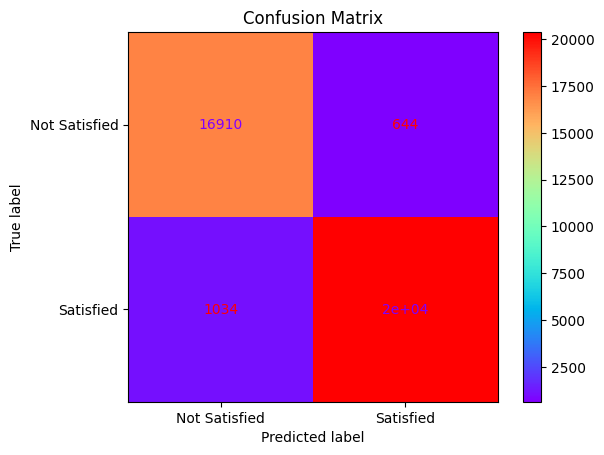

In [24]:
# Confusion Matrix

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Not Satisfied', 'Satisfied'])
disp.plot(cmap='rainbow')
plt.title("Confusion Matrix")
plt.show()

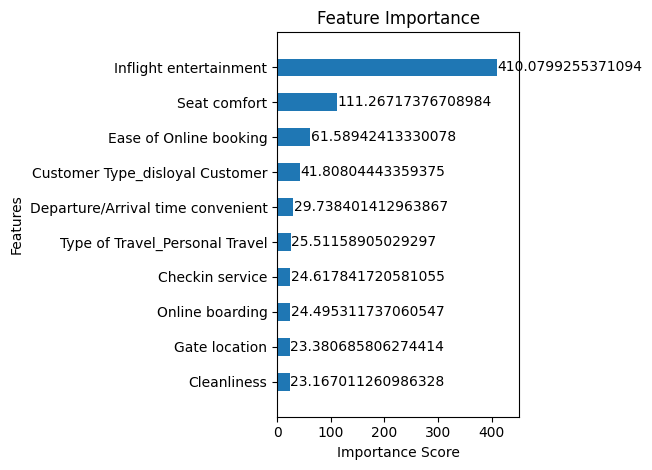

In [25]:
# Plot Importance

from xgboost import plot_importance

plot_importance(
    Trained_model,
    importance_type='gain',
    max_num_features=10,
    height=0.5,
    title='Feature Importance',
    xlabel='Importance Score',
    ylabel='Features',
    grid=False
)
plt.tight_layout()
plt.show()

## Model Training using Decision Tree

In [26]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import model_selection

param_grid = {
    'criterion': ['gini', 'entropy', 'log_loss'],
    'splitter': ['best', 'random'],
    'max_depth': [None, 5, 10, 15, 20],
    # 'min_samples_split': [2, 5, 10],
    # 'min_samples_leaf': [1, 3, 5],
    # 'max_features': ['sqrt', 'log2', None],
    # 'class_weight': [None, 'balanced']
}

dt = DecisionTreeClassifier()
gscvDT = model_selection.GridSearchCV(estimator=dt, param_grid=param_grid, scoring='precision', cv=5)
gscvDT.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [None, 5, 10, 15, 20],
                         'splitter': ['best', 'random']},
             scoring='precision')

In [27]:
print(gscvDT.cv_results_)

{'mean_fit_time': array([0.67422695, 0.26311054, 0.24162288, 0.10055518, 0.51727152,
       0.28059368, 0.63682532, 0.27407174, 0.6604517 , 0.28383384,
       0.81658416, 0.2831531 , 0.25505757, 0.12844348, 0.44562955,
       0.20526047, 0.58781366, 0.36055241, 0.59970279, 0.25414643,
       0.62144179, 0.24260721, 0.27302876, 0.19707613, 0.5486412 ,
       0.20661559, 0.53330216, 0.22364817, 0.57758617, 0.31966572]), 'std_fit_time': array([0.01401978, 0.02217361, 0.01337664, 0.00607879, 0.08411939,
       0.00787879, 0.02245266, 0.03407092, 0.03076613, 0.02969147,
       0.1299705 , 0.02454428, 0.00407113, 0.01002602, 0.02424573,
       0.00348318, 0.06680578, 0.03796161, 0.01470461, 0.02648997,
       0.02449562, 0.02270401, 0.02516532, 0.01225773, 0.12110945,
       0.01638293, 0.01367334, 0.0137477 , 0.01796672, 0.06158545]), 'mean_score_time': array([0.0142489 , 0.01394129, 0.01132607, 0.01057506, 0.01623321,
       0.01682072, 0.01532283, 0.01382499, 0.01357489, 0.01324129,
     

In [28]:
results = pd.DataFrame(gscvDT.cv_results_)
results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_splitter,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.674227,0.014020,0.014249,0.001433,gini,None,best,"{'criterion': 'gini', 'max_depth': None, 'spli...",0.933834,0.934835,0.935646,0.933180,0.933414,0.934182,0.000926,20
1,0.263111,0.022174,0.013941,0.000695,gini,None,random,"{'criterion': 'gini', 'max_depth': None, 'spli...",0.935688,0.935794,0.934275,0.931339,0.936699,0.934759,0.001877,19
2,0.241623,0.013377,0.011326,0.000688,gini,5,best,"{'criterion': 'gini', 'max_depth': 5, 'splitte...",0.899197,0.907720,0.899460,0.897533,0.899990,0.900780,0.003566,25
3,0.100555,0.006079,0.010575,0.000431,gini,5,random,"{'criterion': 'gini', 'max_depth': 5, 'splitte...",0.864600,0.911787,0.882186,0.851275,0.892549,0.880479,0.021137,28
4,0.517272,0.084119,0.016233,0.004942,gini,10,best,"{'criterion': 'gini', 'max_depth': 10, 'splitt...",0.918739,0.941133,0.914471,0.929875,0.942934,0.929431,0.011468,22


In [29]:
for hyper, mean in zip(results['params'], results['mean_test_score']):
    print(f"For the following hyperparameters {hyper}, the mean score is {mean:.2f}")

For the following hyperparameters {'criterion': 'gini', 'max_depth': None, 'splitter': 'best'}, the mean score is 0.93
For the following hyperparameters {'criterion': 'gini', 'max_depth': None, 'splitter': 'random'}, the mean score is 0.93
For the following hyperparameters {'criterion': 'gini', 'max_depth': 5, 'splitter': 'best'}, the mean score is 0.90
For the following hyperparameters {'criterion': 'gini', 'max_depth': 5, 'splitter': 'random'}, the mean score is 0.88
For the following hyperparameters {'criterion': 'gini', 'max_depth': 10, 'splitter': 'best'}, the mean score is 0.93
For the following hyperparameters {'criterion': 'gini', 'max_depth': 10, 'splitter': 'random'}, the mean score is 0.92
For the following hyperparameters {'criterion': 'gini', 'max_depth': 15, 'splitter': 'best'}, the mean score is 0.95
For the following hyperparameters {'criterion': 'gini', 'max_depth': 15, 'splitter': 'random'}, the mean score is 0.95
For the following hyperparameters {'criterion': 'gini'

#### The best hyperparameters have a precision of 95%

## Model Evaluation

In [30]:
# Training the model

Trained_model_dt = DecisionTreeClassifier(criterion = 'log_loss', max_depth =20, splitter = 'random')
Trained_model_dt.fit(x_train, y_train)

# Make predictions

y_pred_dt = Trained_model_dt.predict(x_test)


In [31]:
# Accuracy

print("Accuracy:")
print(f"The accuracy_score for this model is {accuracy_score(y_test, y_pred_dt ):.2f}")
print('\n')
# Precision

print("Precision:")
print(f"The precision_score for this model is {precision_score(y_test, y_pred_dt ):.2f}")
print('\n')

# Recall Score

print("Recall:")
print(f"The recall_score for this model is {recall_score(y_test, y_pred_dt ):.2f}")
print('\n')

# f1_score

print("f1_score:")
print(f"The f1_score for this model is {f1_score(y_test, y_pred_dt ):.2f}")
print('\n')

Accuracy:
The accuracy_score for this model is 0.94


Precision:
The precision_score for this model is 0.95


Recall:
The recall_score for this model is 0.93


f1_score:
The f1_score for this model is 0.94




In [32]:
print("Here is the classification report:")
print(classification_report(y_test, y_pred_dt, target_names=['Not Satisfied', 'Satisfied']))

Here is the classification report:
               precision    recall  f1-score   support

Not Satisfied       0.92      0.94      0.93     17554
    Satisfied       0.95      0.93      0.94     21410

     accuracy                           0.94     38964
    macro avg       0.94      0.94      0.94     38964
 weighted avg       0.94      0.94      0.94     38964



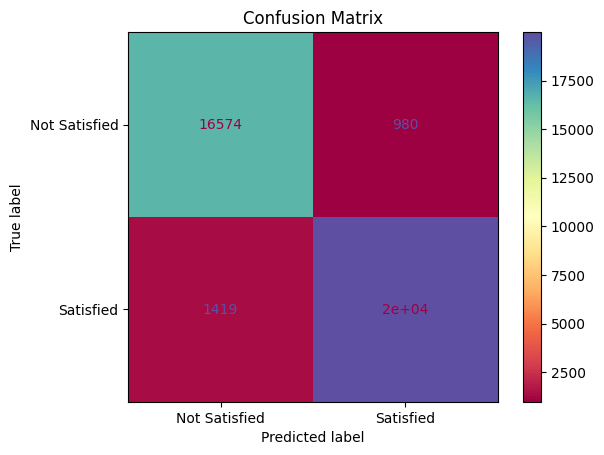

In [33]:
# Confusion Matrix

cm = confusion_matrix(y_test, y_pred_dt)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Not Satisfied', 'Satisfied'])
disp.plot(cmap='Spectral')
plt.title("Confusion Matrix")
plt.show()

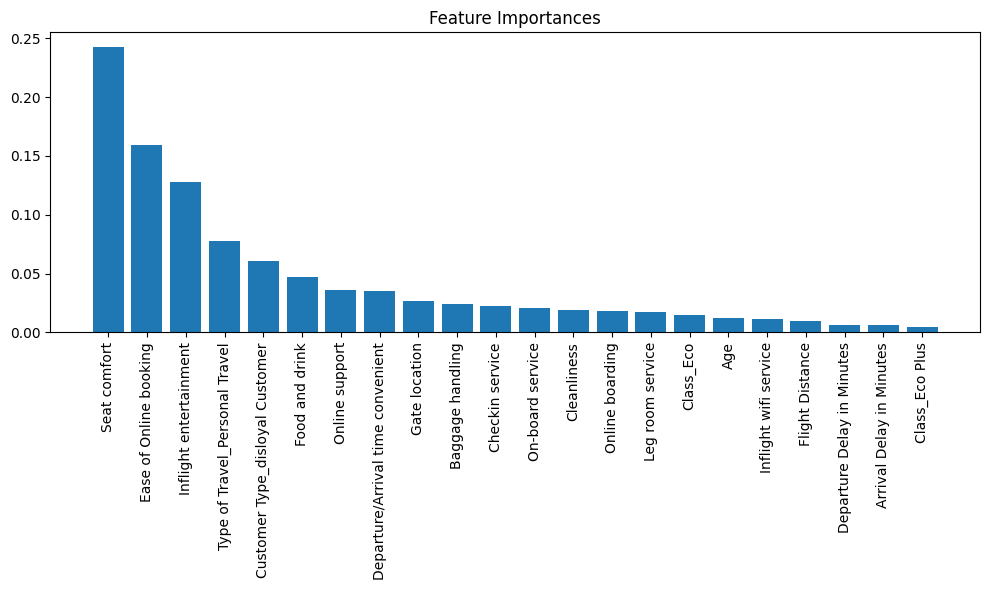

In [34]:
import numpy as np
# Feature Importance
importances = Trained_model_dt.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
plt.bar(range(len(importances)), importances[indices])
plt.xticks(range(len(importances)), [x.columns[i] for i in indices], rotation=90)
plt.tight_layout()
plt.show()

## Model Training using Random Forest

In [35]:
param_grid_rf_basic = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 5, 10],
    # 'min_samples_split': [2, 5],
    # 'min_samples_leaf': [1, 3]
}

rfc = RandomForestClassifier()
gscvrf = model_selection.GridSearchCV(estimator=rfc, param_grid=param_grid_rf_basic, scoring='precision', cv=2)
gscvrf.fit(x_train, y_train)

GridSearchCV(cv=2, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [None, 5, 10],
                         'n_estimators': [50, 100, 200]},
             scoring='precision')

In [36]:
results_rf = pd.DataFrame(gscvrf.cv_results_)
results_rf.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,mean_test_score,std_test_score,rank_test_score
0,3.179180,0.094145,0.409781,0.017003,None,50,"{'max_depth': None, 'n_estimators': 50}",0.960320,0.959724,0.960022,0.000298,3
1,6.941396,0.516212,1.174672,0.199039,None,100,"{'max_depth': None, 'n_estimators': 100}",0.961059,0.959686,0.960373,0.000687,2
2,14.261766,0.194451,1.643953,0.086104,None,200,"{'max_depth': None, 'n_estimators': 200}",0.961036,0.960808,0.960922,0.000114,1
3,1.203223,0.053614,0.141616,0.003340,5,50,"{'max_depth': 5, 'n_estimators': 50}",0.892399,0.895231,0.893815,0.001416,9
4,2.905782,0.485598,0.248246,0.002079,5,100,"{'max_depth': 5, 'n_estimators': 100}",0.893453,0.897533,0.895493,0.002040,7


In [37]:
for hyper, mean in zip(results_rf['params'], results_rf['mean_test_score']):
    print(f"For the following hyperparameters {hyper}, the mean score is {mean:.2f}")

For the following hyperparameters {'max_depth': None, 'n_estimators': 50}, the mean score is 0.96
For the following hyperparameters {'max_depth': None, 'n_estimators': 100}, the mean score is 0.96
For the following hyperparameters {'max_depth': None, 'n_estimators': 200}, the mean score is 0.96
For the following hyperparameters {'max_depth': 5, 'n_estimators': 50}, the mean score is 0.89
For the following hyperparameters {'max_depth': 5, 'n_estimators': 100}, the mean score is 0.90
For the following hyperparameters {'max_depth': 5, 'n_estimators': 200}, the mean score is 0.90
For the following hyperparameters {'max_depth': 10, 'n_estimators': 50}, the mean score is 0.93
For the following hyperparameters {'max_depth': 10, 'n_estimators': 100}, the mean score is 0.92
For the following hyperparameters {'max_depth': 10, 'n_estimators': 200}, the mean score is 0.92


## Model Evaluation

In [38]:
# Training the model

Trained_model_rf = RandomForestClassifier(max_depth = None, n_estimators =50)
Trained_model_rf.fit(x_train, y_train)

# Make predictions

y_pred_rf = Trained_model_rf.predict(x_test)


In [39]:
# Accuracy

print("Accuracy:")
print(f"The accuracy_score for this model is {accuracy_score(y_test, y_pred_rf ):.2f}")
print('\n')
# Precision

print("Precision:")
print(f"The precision_score for this model is {precision_score(y_test, y_pred_rf ):.2f}")
print('\n')

# Recall Score

print("Recall:")
print(f"The recall_score for this model is {recall_score(y_test, y_pred_rf ):.2f}")
print('\n')

# f1_score

print("f1_score:")
print(f"The f1_score for this model is {f1_score(y_test, y_pred_rf ):.2f}")
print('\n')

Accuracy:
The accuracy_score for this model is 0.95


Precision:
The precision_score for this model is 0.97


Recall:
The recall_score for this model is 0.95


f1_score:
The f1_score for this model is 0.96




In [40]:
print("Here is the classification report:")
print(classification_report(y_test, y_pred_rf, target_names=['Not Satisfied', 'Satisfied']))

Here is the classification report:
               precision    recall  f1-score   support

Not Satisfied       0.94      0.96      0.95     17554
    Satisfied       0.97      0.95      0.96     21410

     accuracy                           0.95     38964
    macro avg       0.95      0.95      0.95     38964
 weighted avg       0.95      0.95      0.95     38964



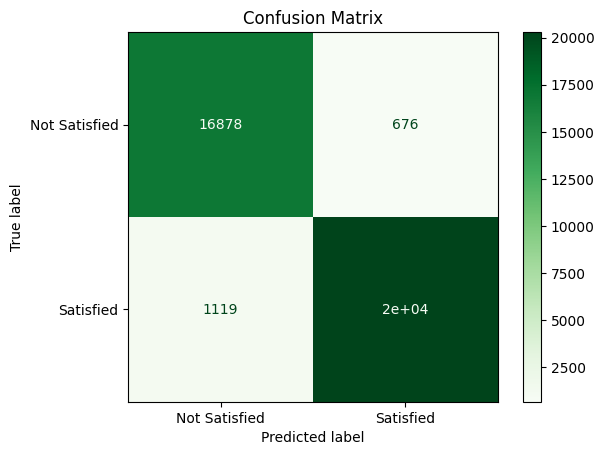

In [41]:
# Confusion Matrix

cm = confusion_matrix(y_test, y_pred_rf)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Not Satisfied', 'Satisfied'])
disp.plot(cmap='Greens')
plt.title("Confusion Matrix")
plt.show()

In [42]:
importance = Trained_model_rf.feature_importances_
feature_names = x_train.columns

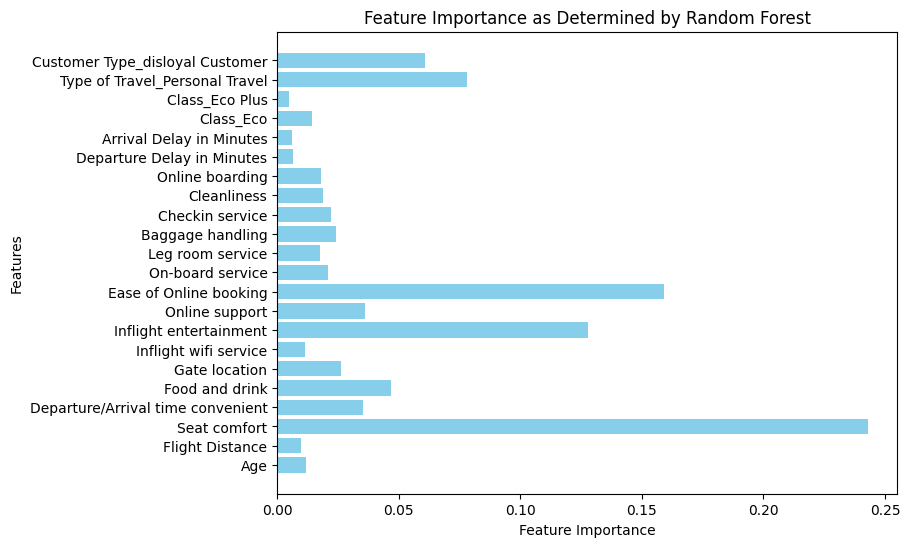

In [43]:
plt.figure(figsize=(8, 6))
plt.barh(feature_names, importances, color='skyblue')
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Feature Importance as Determined by Random Forest')
plt.show()

## Conclusion

The consistently high accuracy across three different tree-based models (XGBoost, Decision Tree, and Random Forest), all exceeding 94% after effective hyperparameter tuning and feature engineering, strongly suggests that seat comfort, ease of online booking and inflight entertainment are indeed highly predictive features for airline passenger satisfaction. The subtle differences in accuracy, with XGBoost slightly outperforming the others, indicate that while both features are crucial, the more sophisticated gradient boosting approach of XGBoost might capture slightly more complex relationships or interactions within the data related to these features and satisfaction levels. This implies that airlines focusing on optimizing these two areas are likely to see significant positive impacts on passenger satisfaction scores, regardless of the specific advanced modeling technique used.

While XGBoost demonstrates a marginal improvement in predictive power, the fact that even a single, well-tuned Decision Tree achieves 94% accuracy underscores the dominant influence of seat comfort and inflight entertainment. This highlights the diminishing returns of employing more complex models when the signal from the most important features is already very strong. Airlines should prioritize maintaining and enhancing these two core aspects of the passenger experience, as they are clearly the primary drivers of satisfaction. The high performance across models also suggests the dataset likely contains a clear and direct relationship between these features and the target variable, making the prediction task relatively straightforward once the key drivers are considered.
